In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel("Height-Width.xlsx")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.head(5)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
df.shape

(3501, 2)

In [8]:
df.isnull()
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [9]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [10]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [27]:
x = df[['Height']]
x.head(5)

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [28]:
y=df[['Weight']]
y.head(5)

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [13]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=5)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)


LinearRegression()

In [20]:
m = reg.coef_
m

array([[6.00809929]])

In [21]:
c = reg.intercept_
c

array([-227.77595602])

In [38]:
reg.predict([[74.110105]])


F:\Antim_Doc_softwar\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[217.48491285]])

In [35]:
data=reg.predict(xtest)
data

array([[156.22895255],
       [171.26045447],
       [186.87942774],
       ...,
       [205.60020285],
       [186.14253731],
       [219.24585226]])

In [55]:
df.drop(['Predicted Result'],axis='columns')


,Height,Weight,Predicted weight
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812
...,...,...,...
3496,69.296830,185.649086,188.566279
3497,70.542201,210.198845,196.048594
3498,73.912549,202.429960,216.297978
3499,67.396021,144.277671,177.146028


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(ytest,data)
mse

102.60138482843213

In [61]:
mae = mean_absolute_error(ytest,data)
mae

8.061150778858023

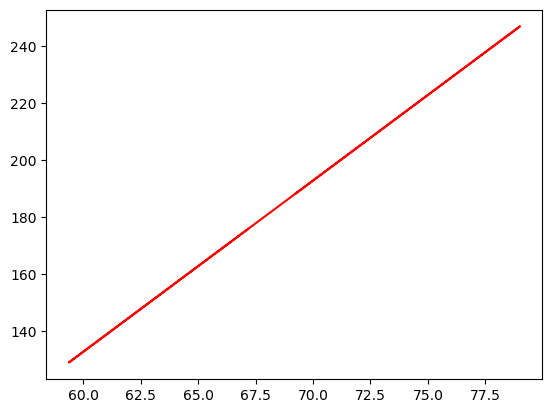

In [62]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

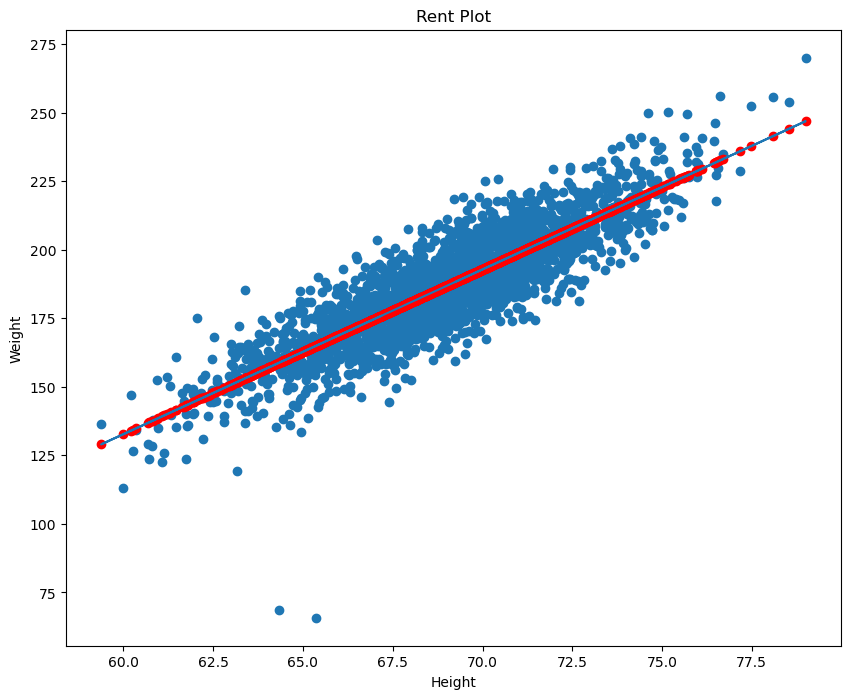

In [67]:
plt.figure(figsize=(10,8))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Rent Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [68]:
import pickle as pk
import joblib as jb

In [69]:
pk.dump(reg,open("first","wb"))

In [70]:
reg2 = pk.load(open("first","rb"))

In [72]:
reg2.predict([[100]])

F:\Antim_Doc_softwar\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[373.03397249]])

In [73]:
jb.dump(reg, "second")

['second']